In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

In [67]:
mag7 = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']
top15_sp500 = mag7 + ['GOOG', 'BRK-B', 'UNH', 'XOM', 'LLY', 'JPM', 'JNJ', 'V']
sp500 = 'SPY'
start_date = '2000-01-01'

In [68]:
df = yf.download([sp500] + top15_sp500, start=start_date)
df = df['Adj Close']
df

[*********************100%%**********************]  16 of 16 completed


Ticker,AAPL,AMZN,BRK-B,GOOG,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,SPY,TSLA,UNH,V,XOM
Date,,,,,,,,,,,,,,,,
2000-01-03,0.844004,4.468750,35.299999,NaN,NaN,24.500576,23.645041,32.953949,NaN,36.000618,0.089453,93.290169,NaN,5.377779,NaN,18.181025
2000-01-04,0.772846,4.096875,34.080002,NaN,NaN,23.603605,23.126225,31.917292,NaN,34.784531,0.087065,89.641960,NaN,5.308994,NaN,17.832775
2000-01-05,0.784155,3.487500,34.639999,NaN,NaN,23.852768,22.983469,32.325668,NaN,35.151295,0.084199,89.802315,NaN,5.296489,NaN,18.804949
2000-01-06,0.716296,3.278125,36.080002,NaN,NaN,24.600243,23.309769,33.268112,NaN,33.973801,0.078705,88.359077,NaN,5.490338,NaN,19.777126
2000-01-07,0.750226,3.478125,36.400002,NaN,NaN,25.646700,23.738031,35.718449,NaN,34.417759,0.080019,93.490654,NaN,6.134418,NaN,19.719084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-08,213.063385,165.800003,431.540009,163.839996,162.029999,160.220001,204.059998,845.309998,509.630005,402.690002,104.970001,530.650024,198.839996,566.239990,259.309998,117.889999
2024-08-09,215.990005,166.940002,431.670013,165.389999,163.669998,160.619995,205.800003,891.679993,517.770020,406.019989,104.750000,532.989990,200.000000,558.760010,259.760010,118.849998
2024-08-12,217.529999,166.800003,430.390015,163.949997,162.289993,159.880005,206.190002,884.380005,515.950012,406.809998,109.019997,533.270020,197.490005,565.289978,259.890015,119.000000


In [70]:
mag7_df = df[mag7]
spy_df = df['SPY'].copy()
mag7_df

Ticker,GOOGL,AMZN,AAPL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2000-01-03,NaN,4.468750,0.844004,NaN,36.000618,0.089453,NaN
2000-01-04,NaN,4.096875,0.772846,NaN,34.784531,0.087065,NaN
2000-01-05,NaN,3.487500,0.784155,NaN,35.151295,0.084199,NaN
2000-01-06,NaN,3.278125,0.716296,NaN,33.973801,0.078705,NaN
2000-01-07,NaN,3.478125,0.750226,NaN,34.417759,0.080019,NaN
...,...,...,...,...,...,...,...
2024-08-08,162.029999,165.800003,213.063385,509.630005,402.690002,104.970001,198.839996
2024-08-09,163.669998,166.940002,215.990005,517.770020,406.019989,104.750000,200.000000
2024-08-12,162.289993,166.800003,217.529999,515.950012,406.809998,109.019997,197.490005


In [71]:
spy_df

Date
2000-01-03     93.290169
2000-01-04     89.641960
2000-01-05     89.802315
2000-01-06     88.359077
2000-01-07     93.490654
                 ...    
2024-08-08    530.650024
2024-08-09    532.989990
2024-08-12    533.270020
2024-08-13    542.039978
2024-08-14    543.750000
Name: SPY, Length: 6193, dtype: float64

In [72]:
betass = dict()
alphass = dict()
datess = dict()
rss = dict()

tickers = top15_sp500
days = 125

for ticker in tickers:
    betas = []
    alphas = []
    rs = []
    dates = []
    for _df in df.rolling(days):
        returns = _df[ticker].pct_change().dropna()
        if returns.shape[0] != days - 1:
            continue
        b_returns = _df['SPY'].pct_change()[_df['SPY'].pct_change().index >= returns.index[0]]
        beta, alpha, r, _, _ = stats.linregress(b_returns, returns)
        betas.append(beta)
        alphas.append(alpha)
        rs.append(r)
        dates.append(_df.index[-1])
    
    betass[ticker] = betas
    alphass[ticker] = alphas
    datess[ticker] = dates
    rss[ticker] = rs

/var/folders/y9/2slpdtcd62sccy809rd8q1pc0000gn/T/ipykernel_37273/2226691179.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = _df[ticker].pct_change().dropna()


In [ ]:
dates_indexes = max([len(d) for d in datess.values()])

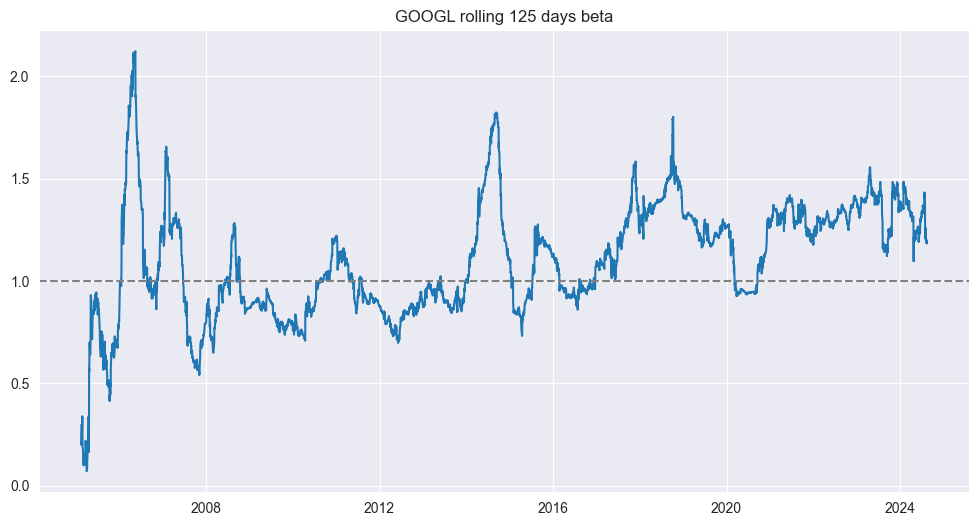

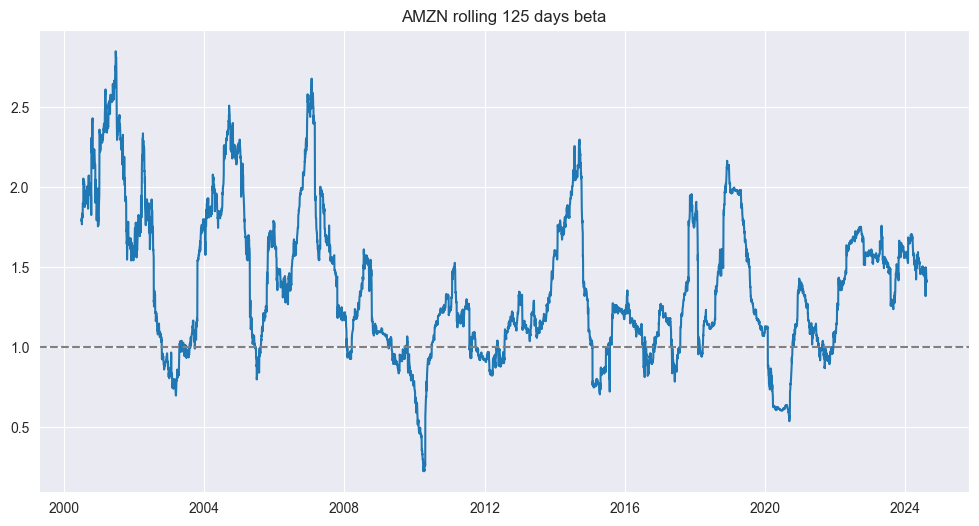

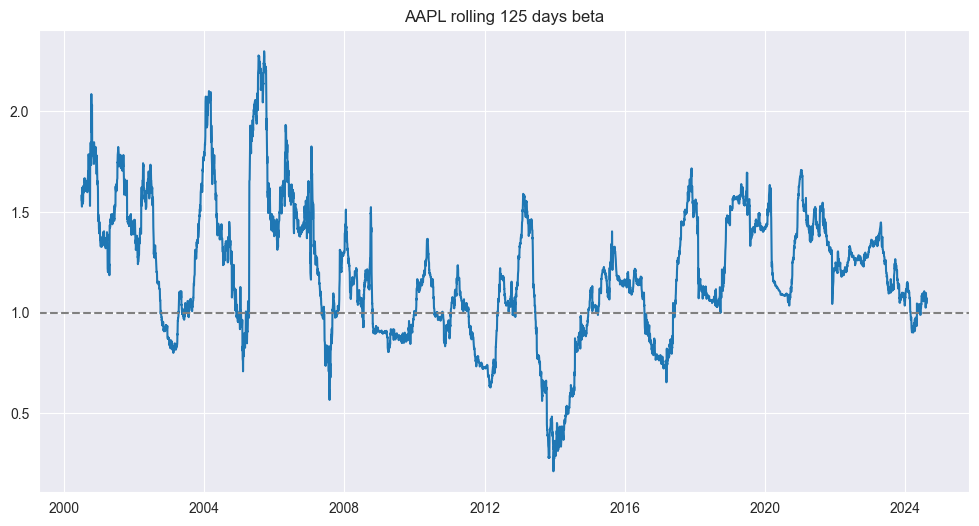

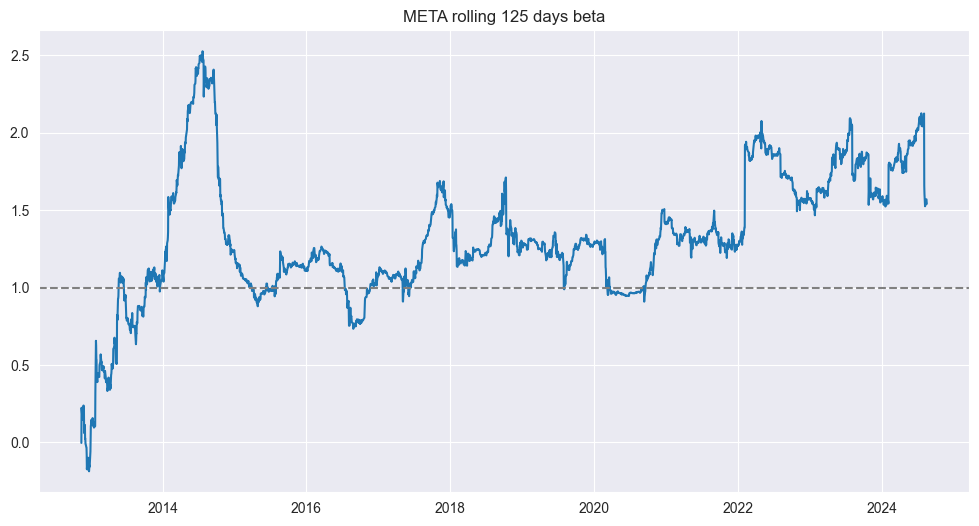

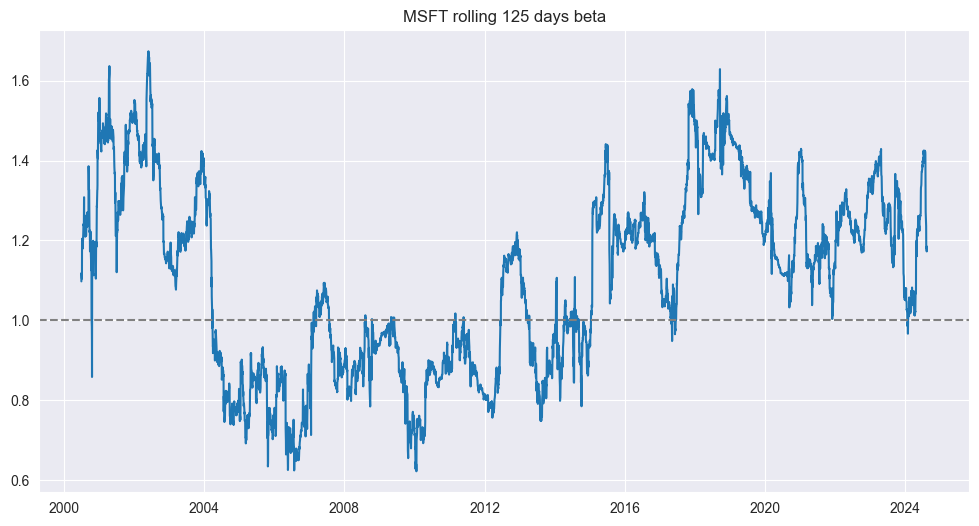

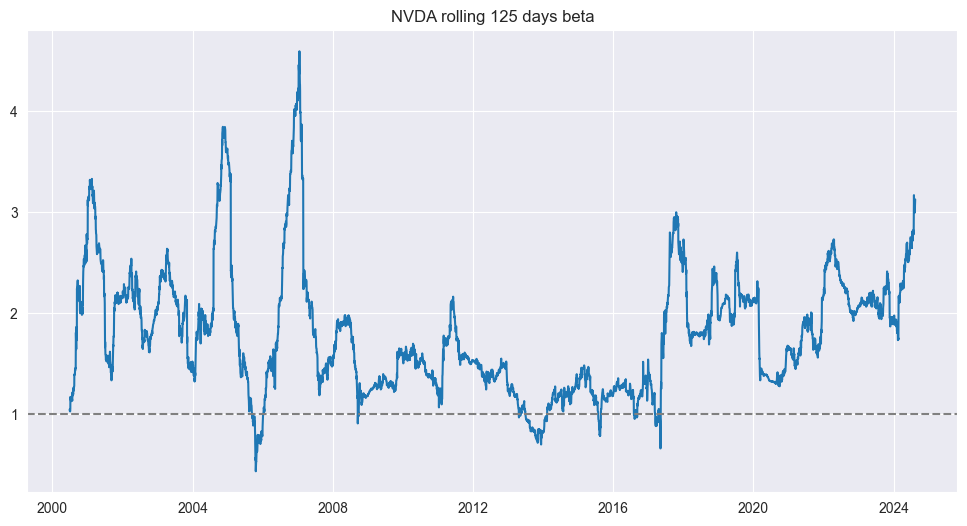

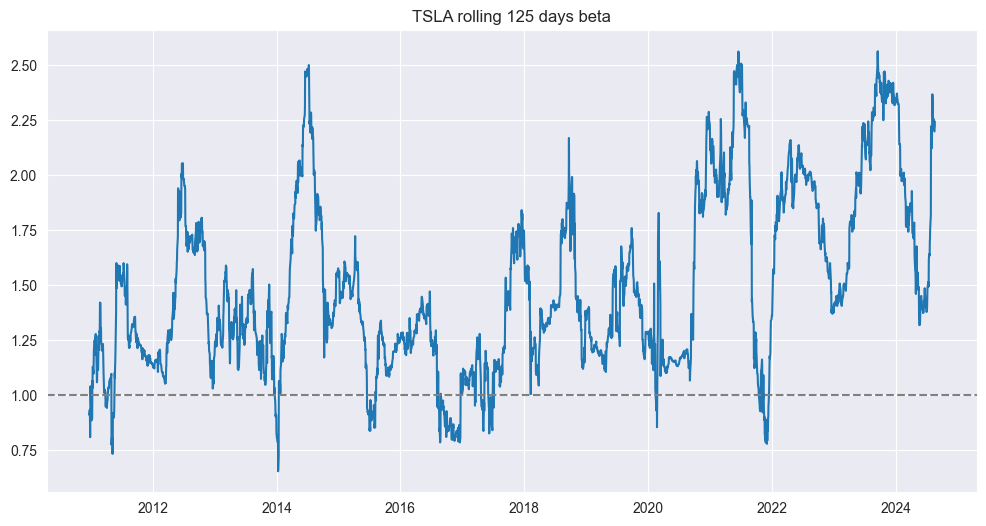

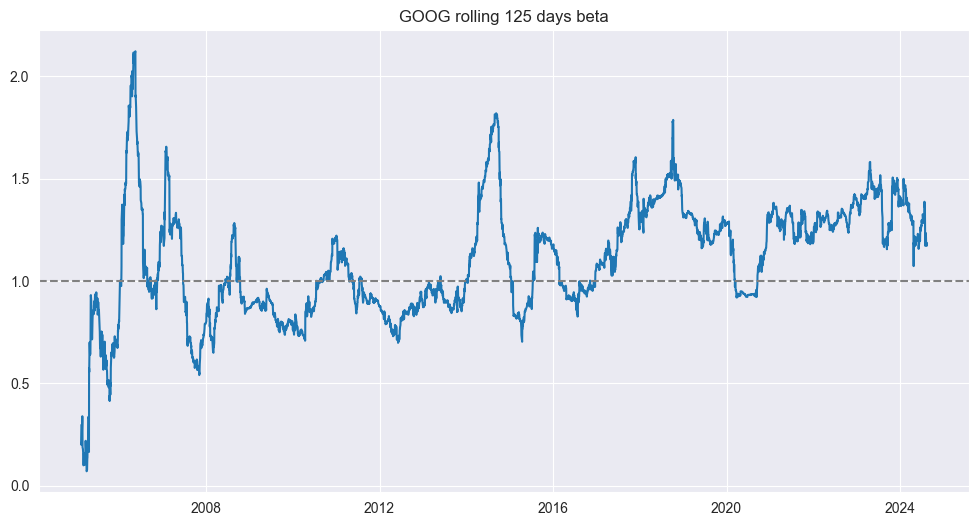

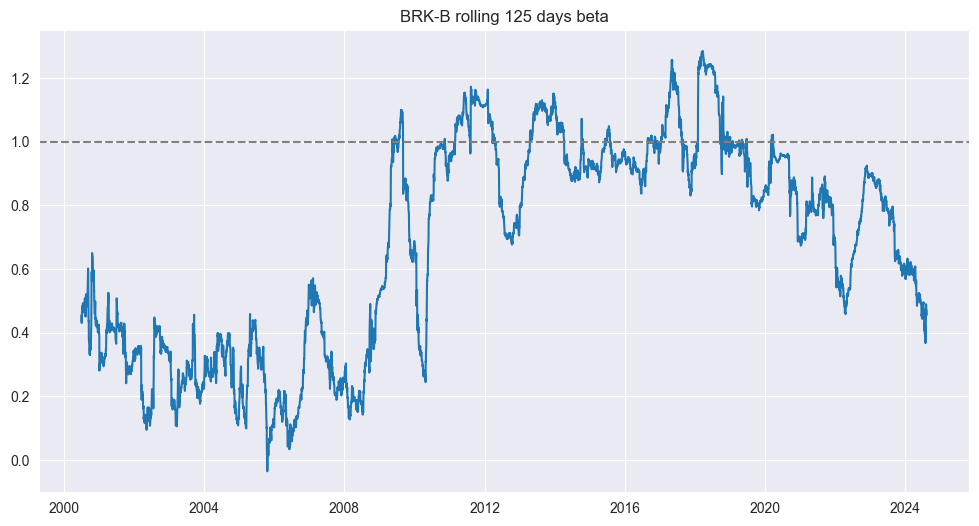

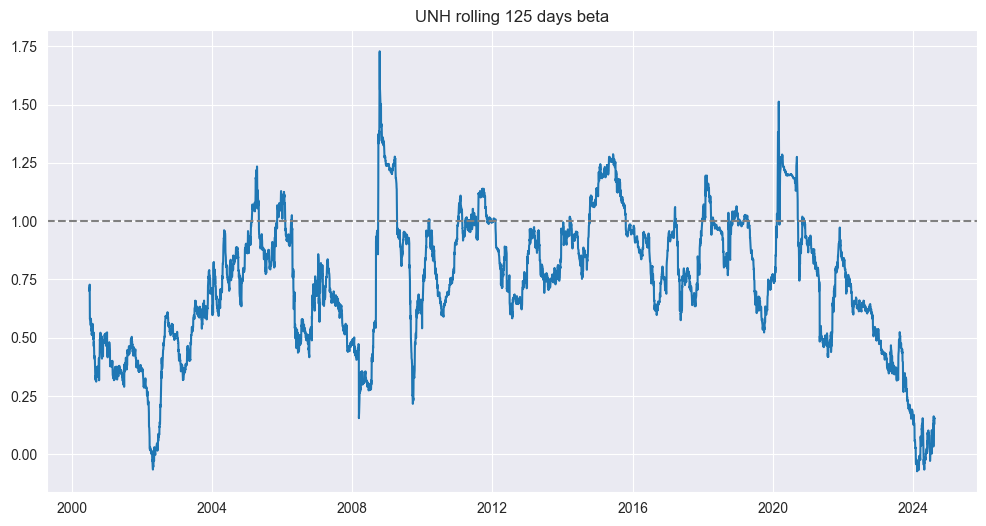

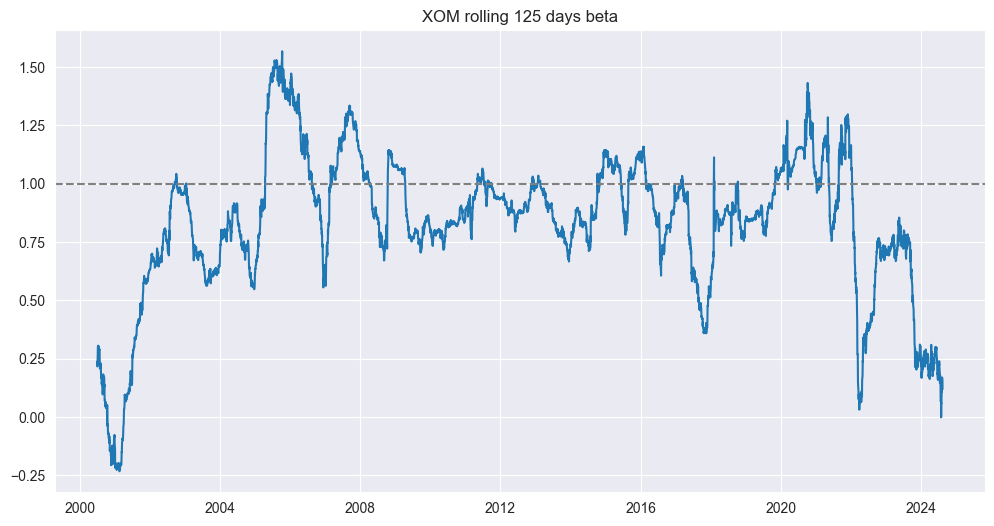

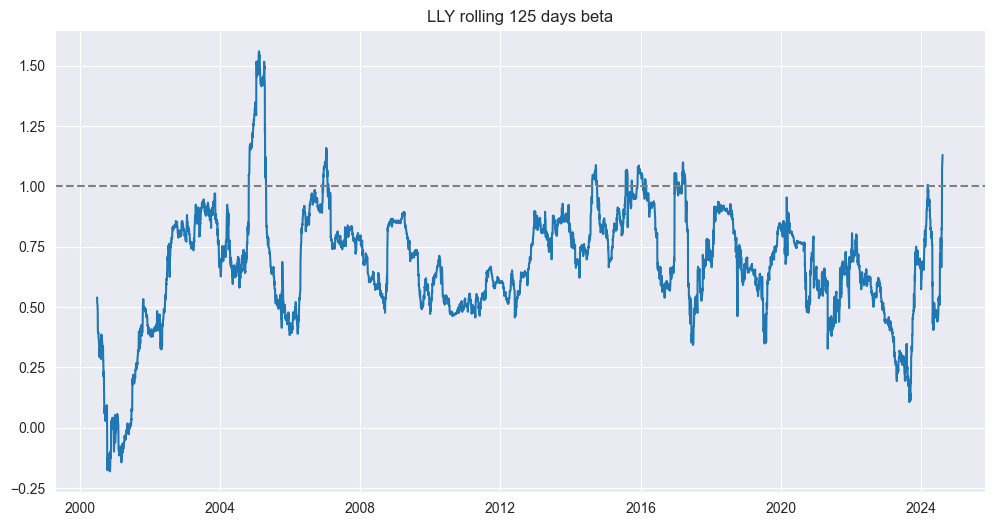

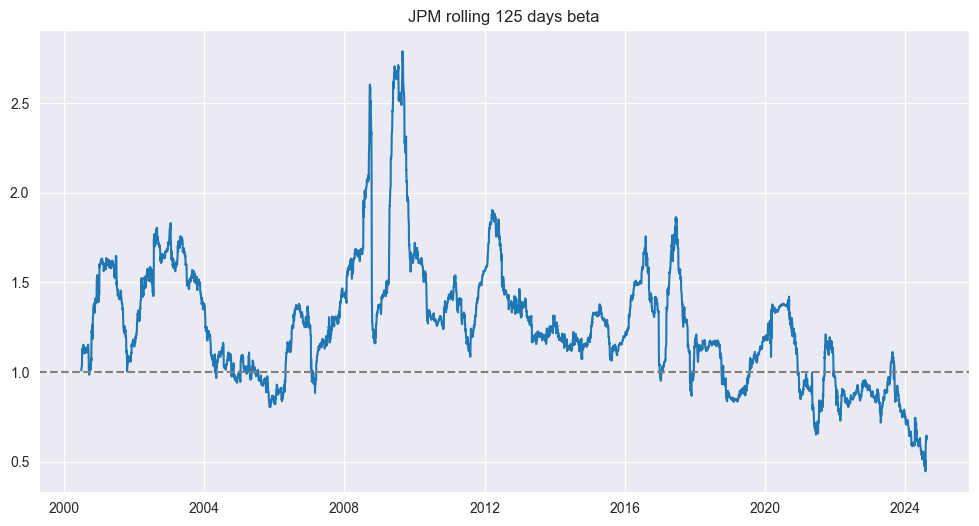

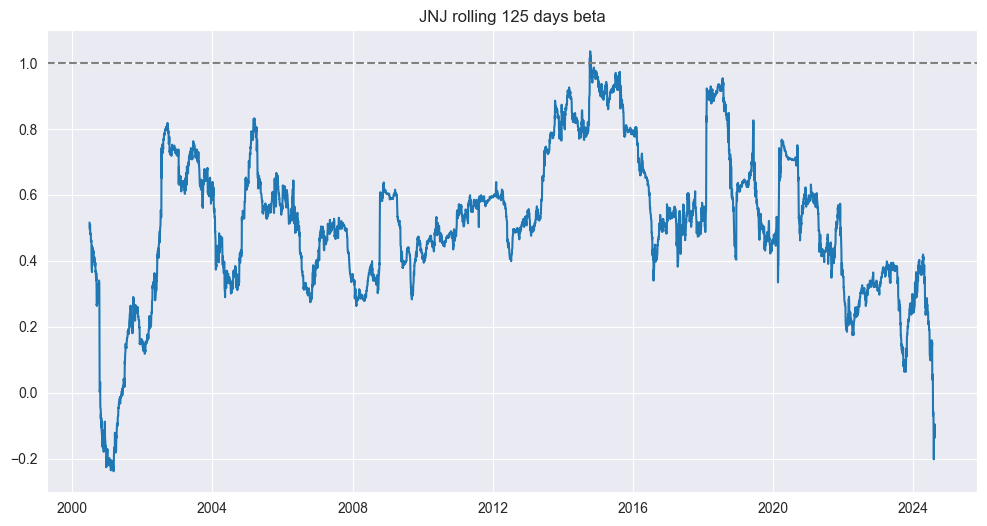

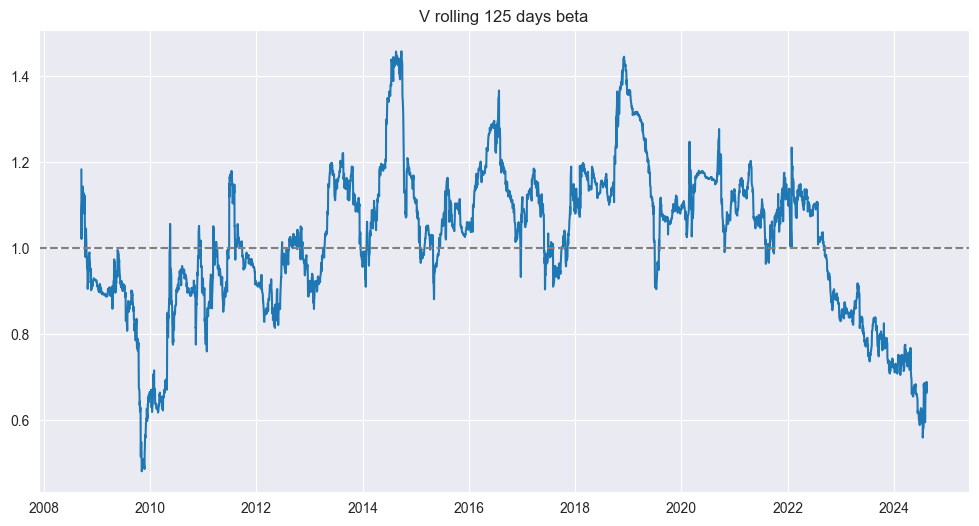

In [76]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], betass[ticker])
    plt.axhline(1, color='grey', linestyle='--')
    plt.title(f'{ticker} rolling {days} days beta')


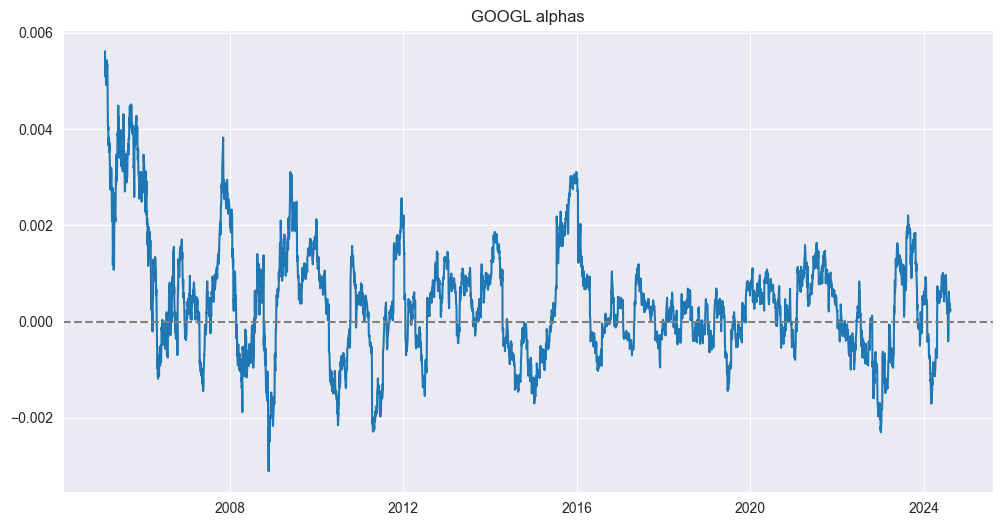

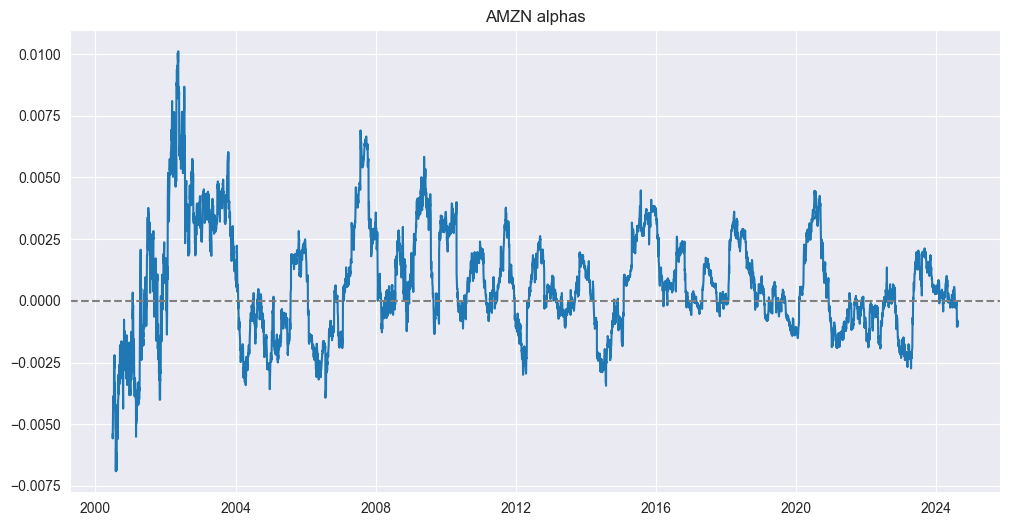

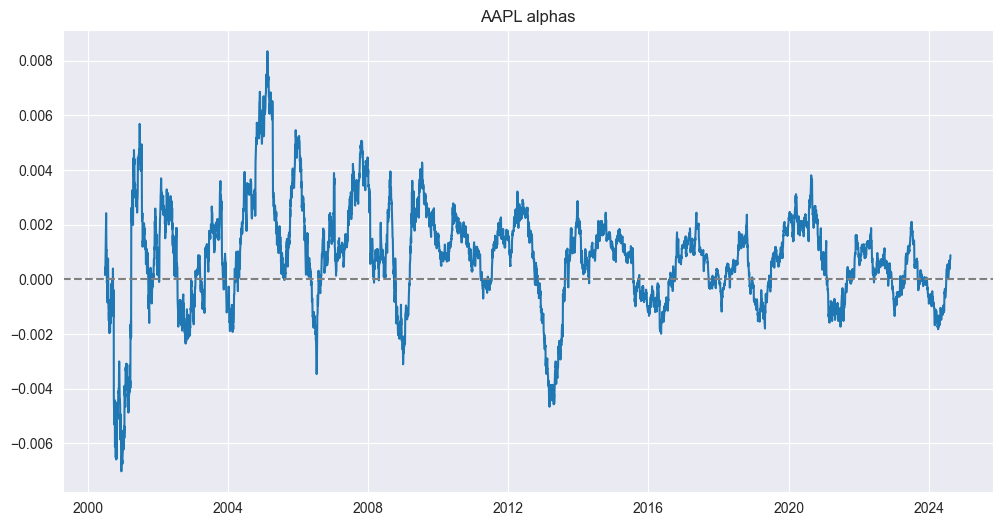

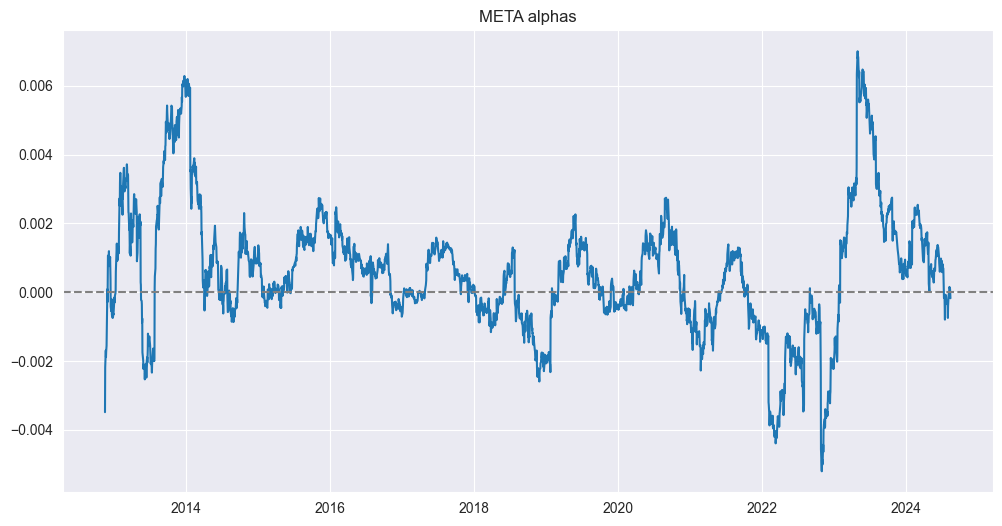

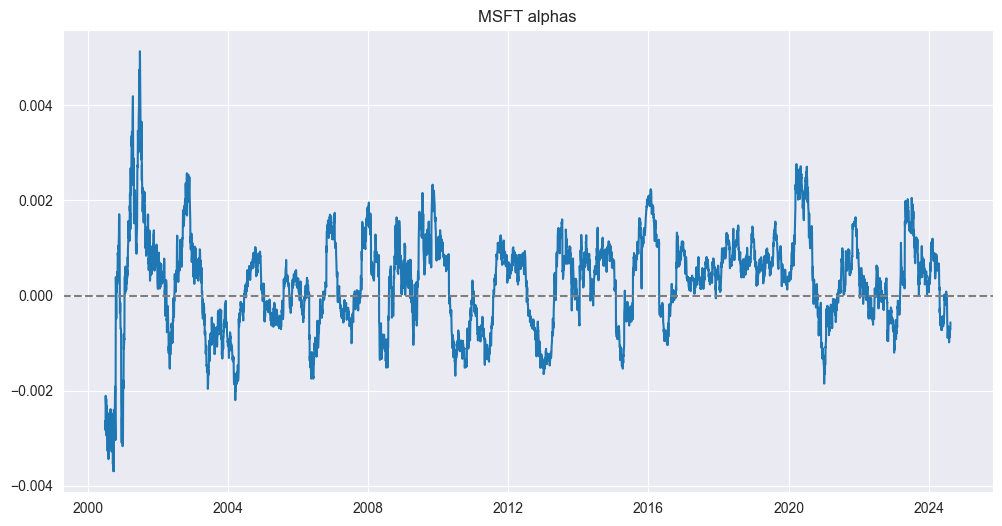

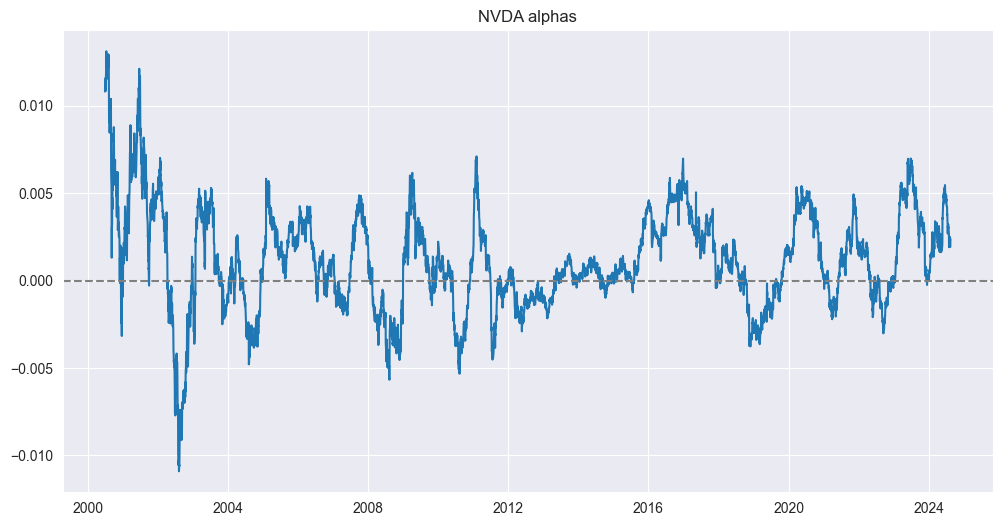

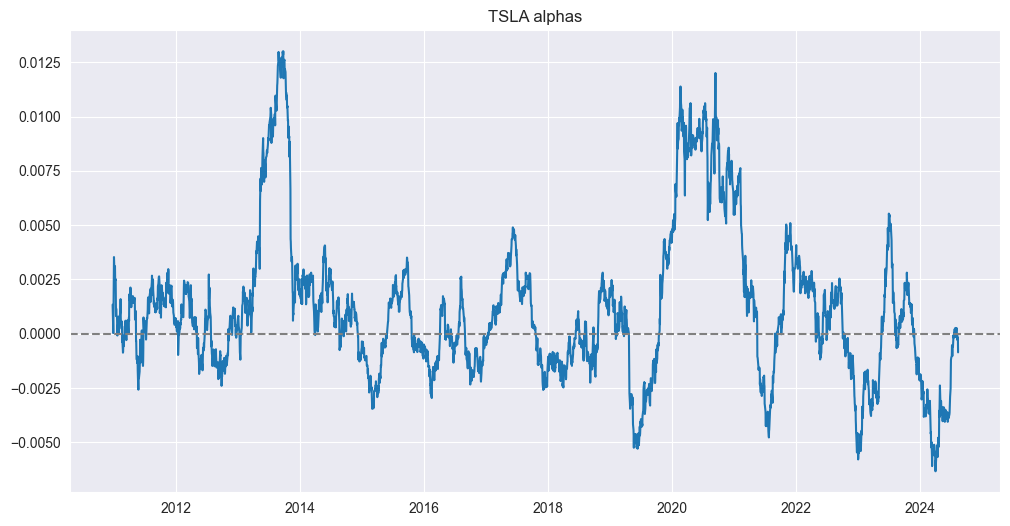

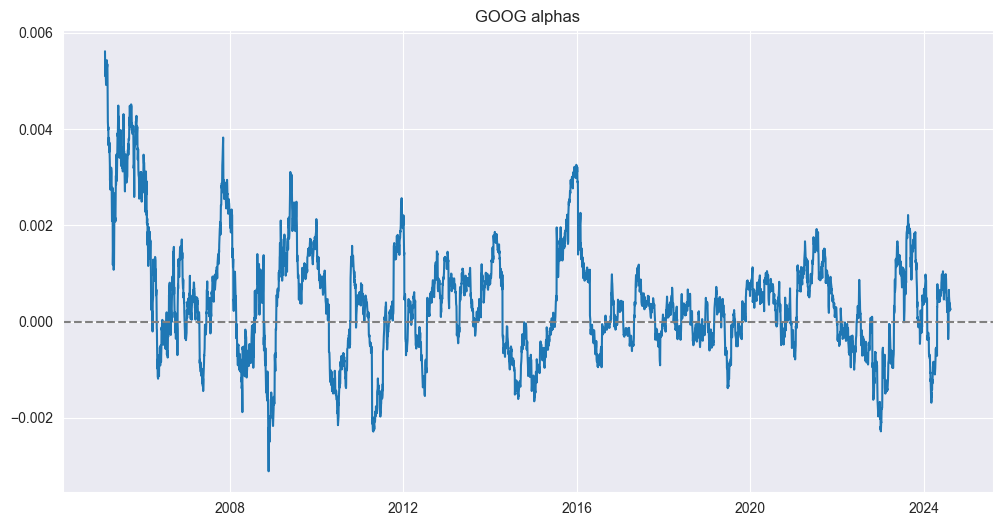

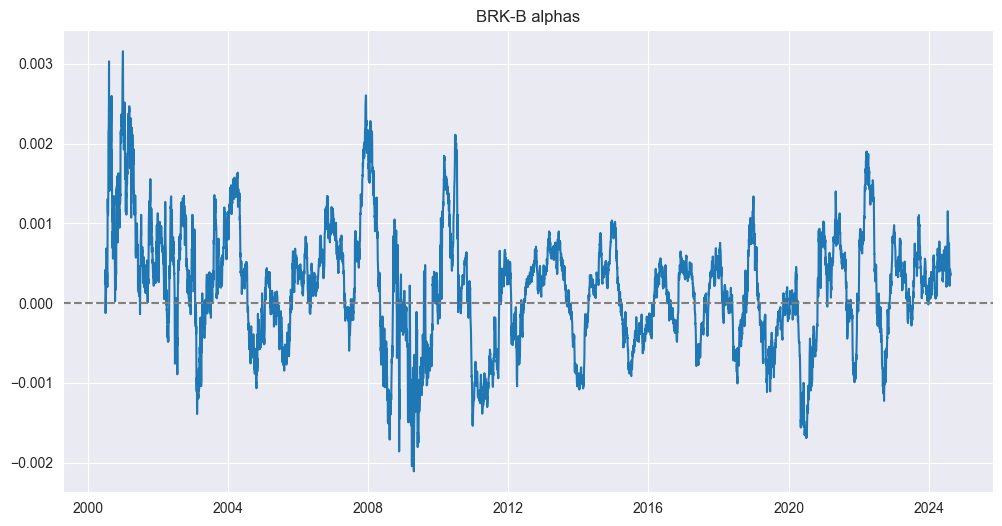

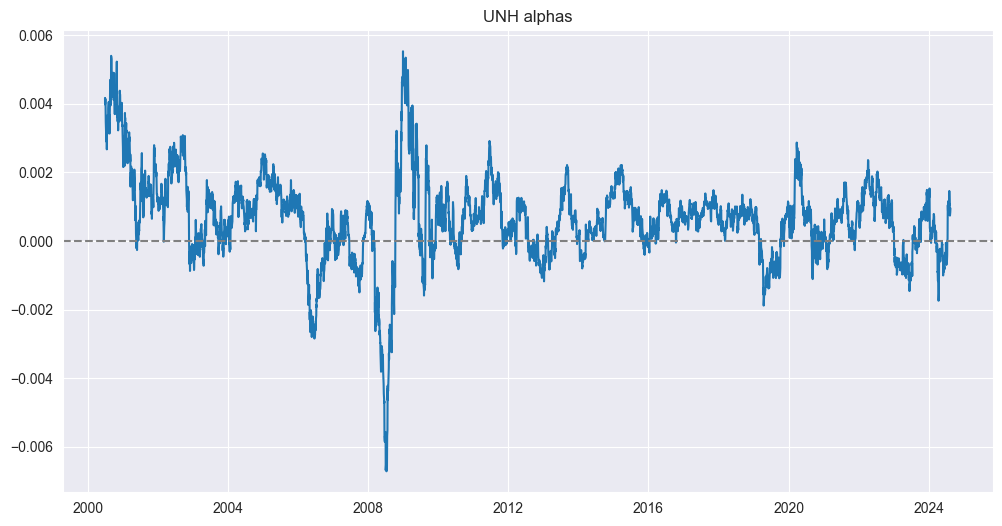

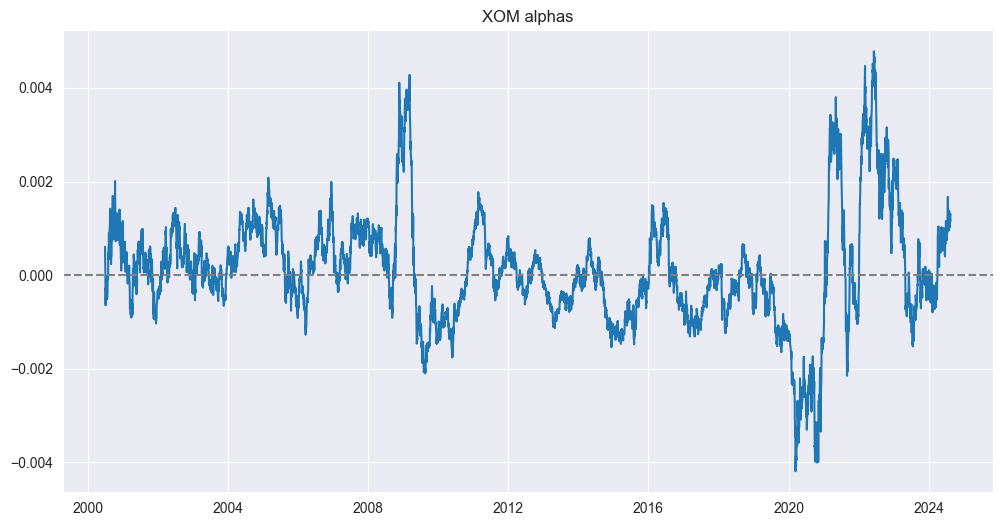

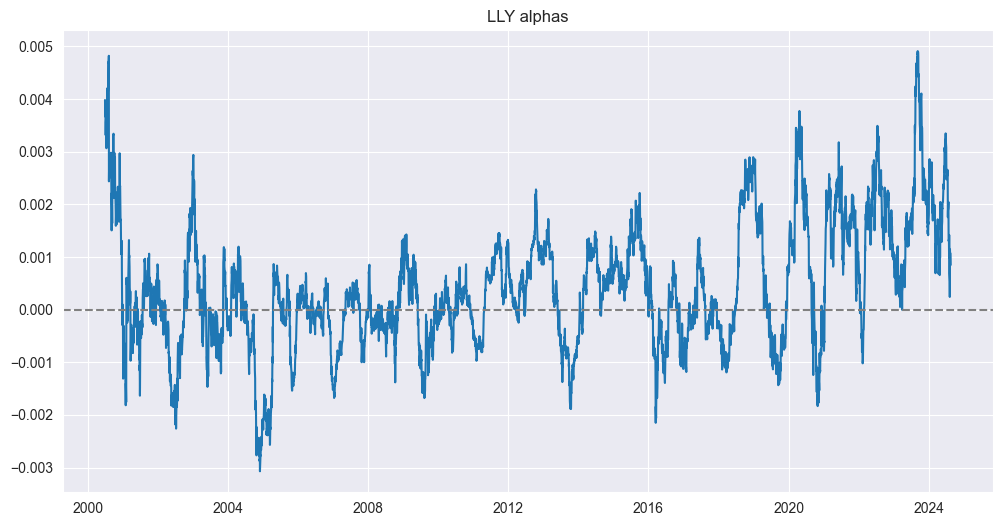

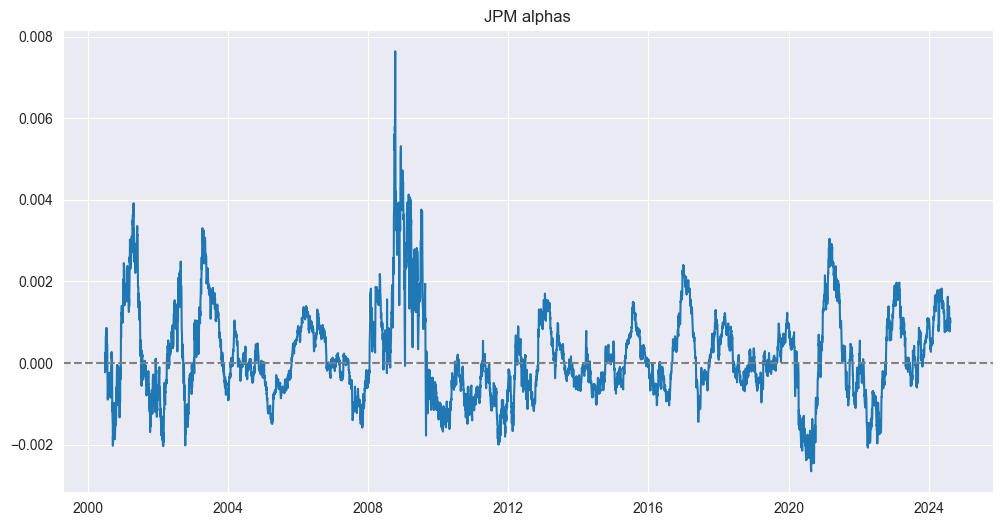

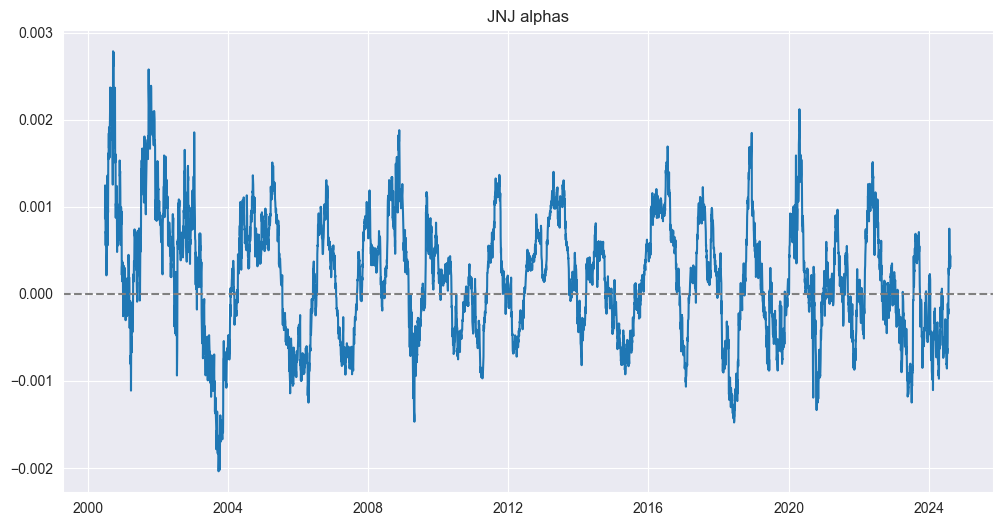

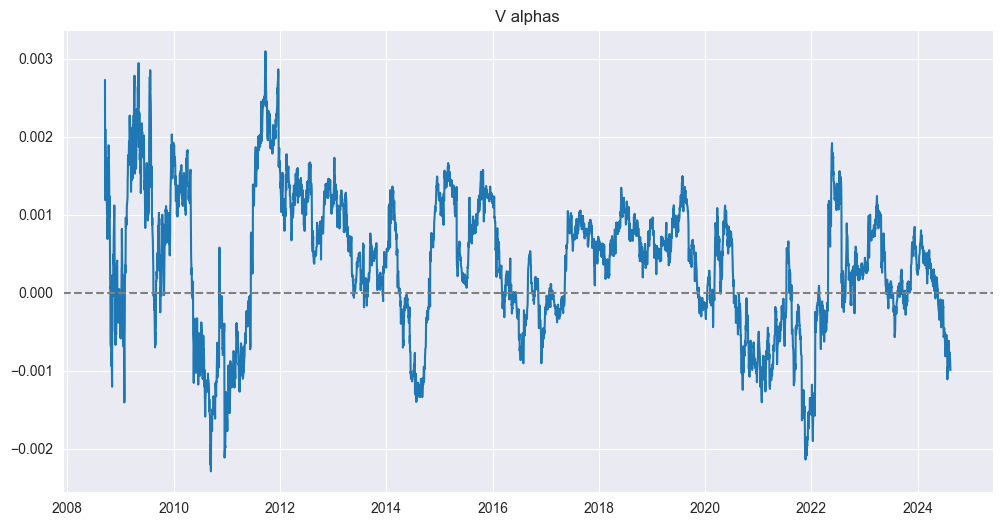

In [74]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], alphass[ticker])
    plt.axhline(0, color='grey', linestyle='--')
    plt.title(f'{ticker} alphas')

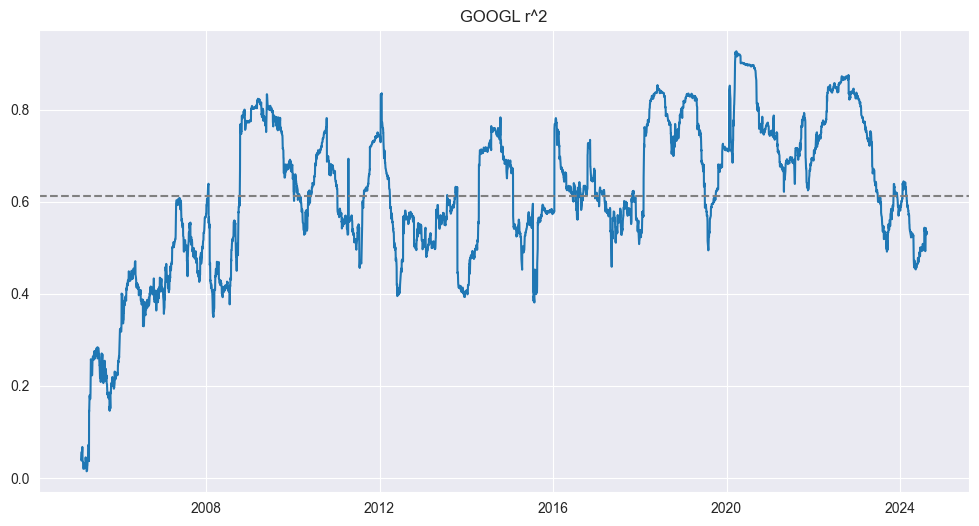

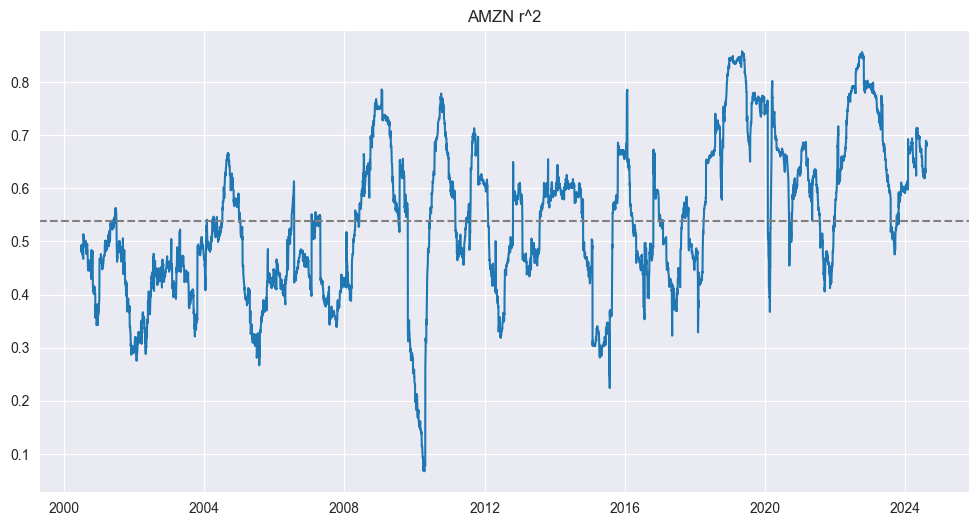

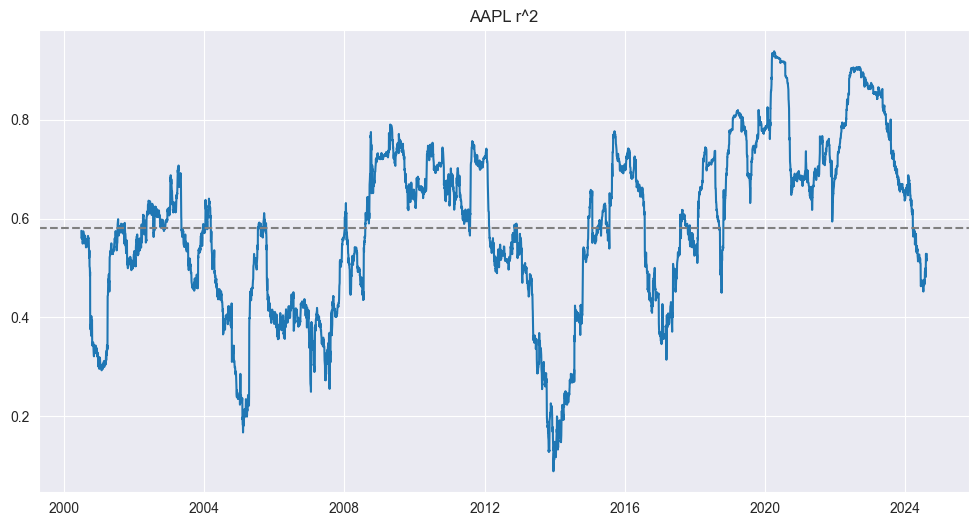

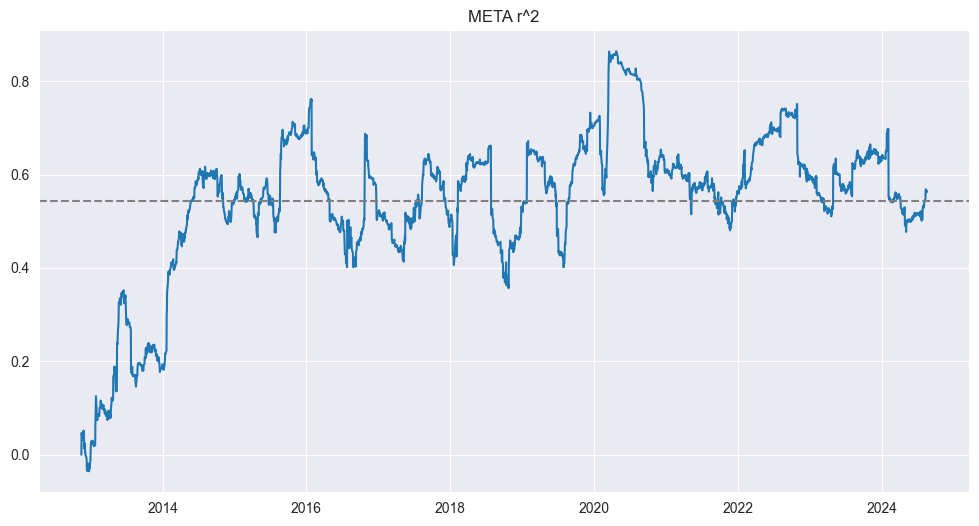

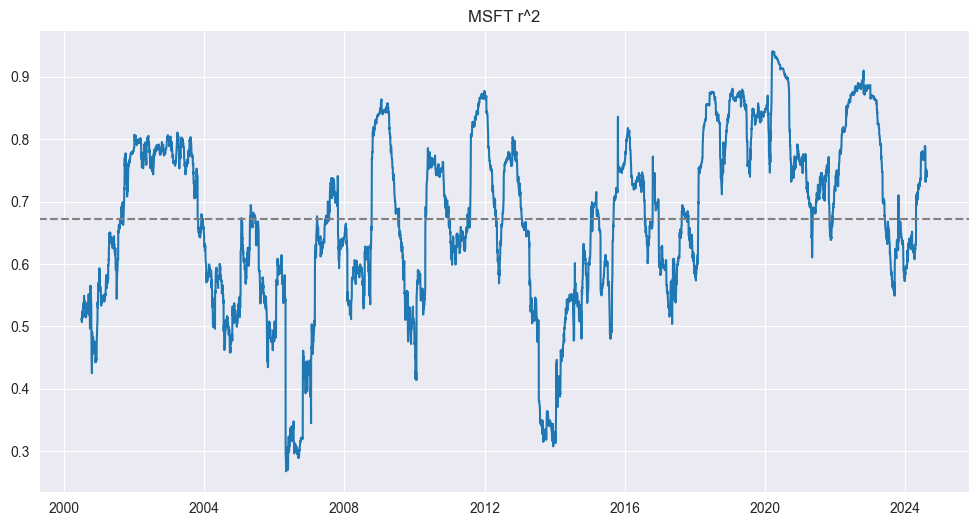

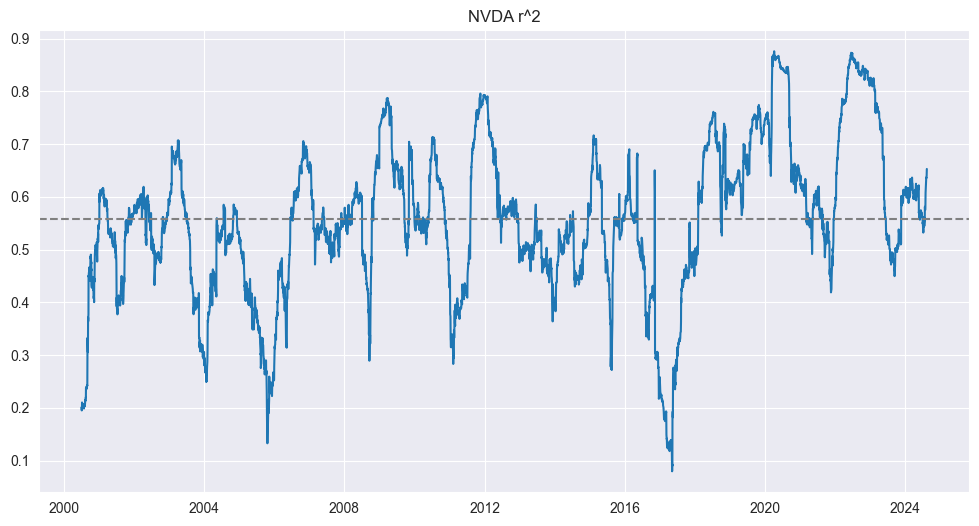

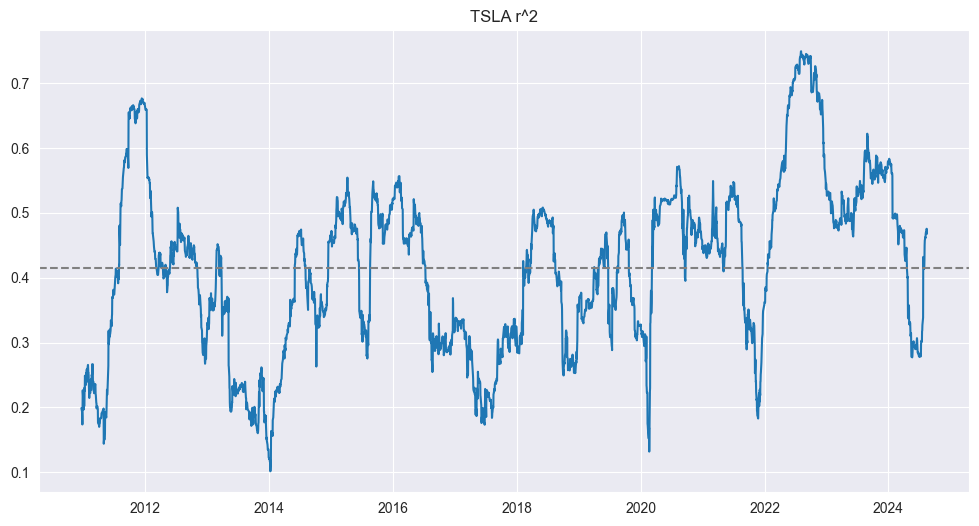

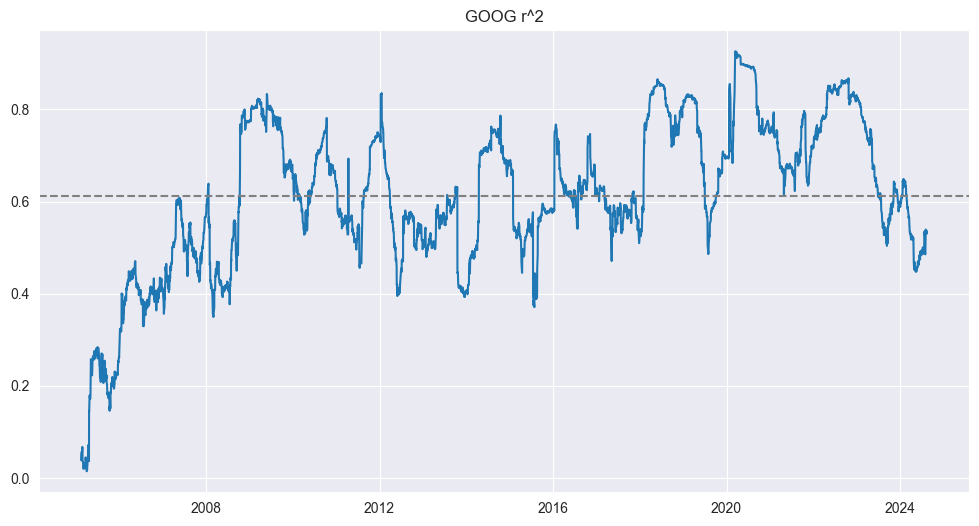

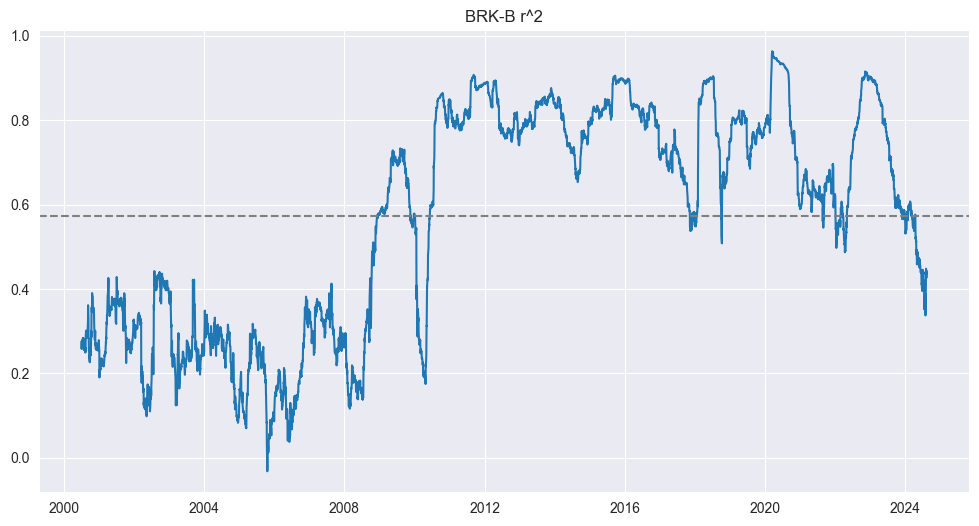

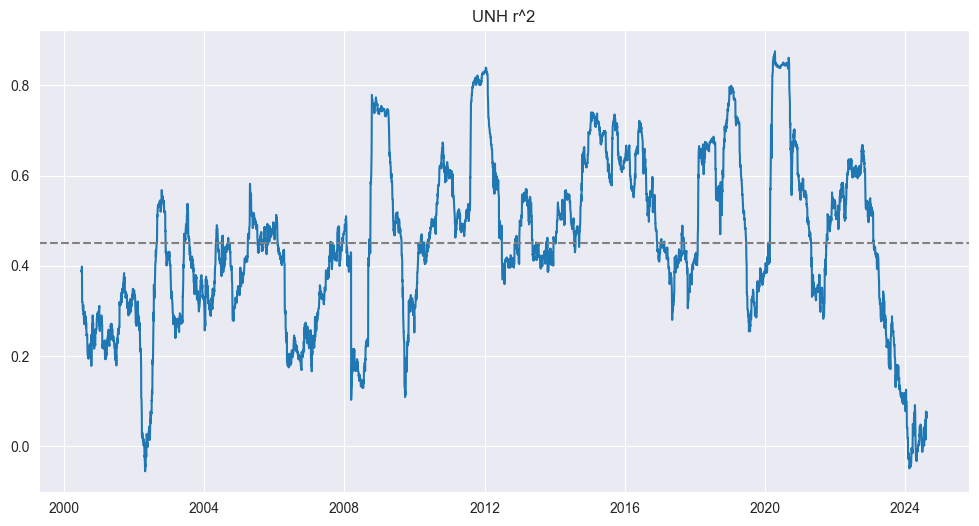

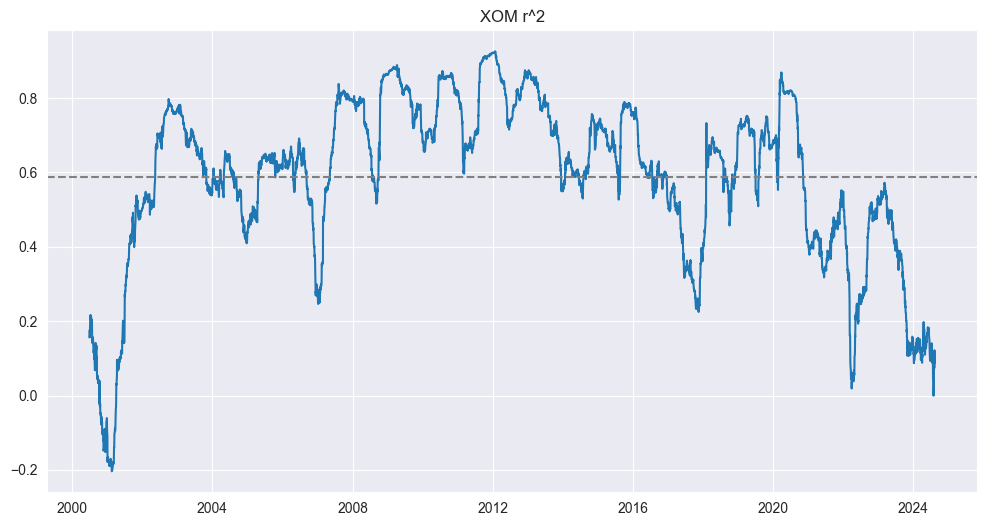

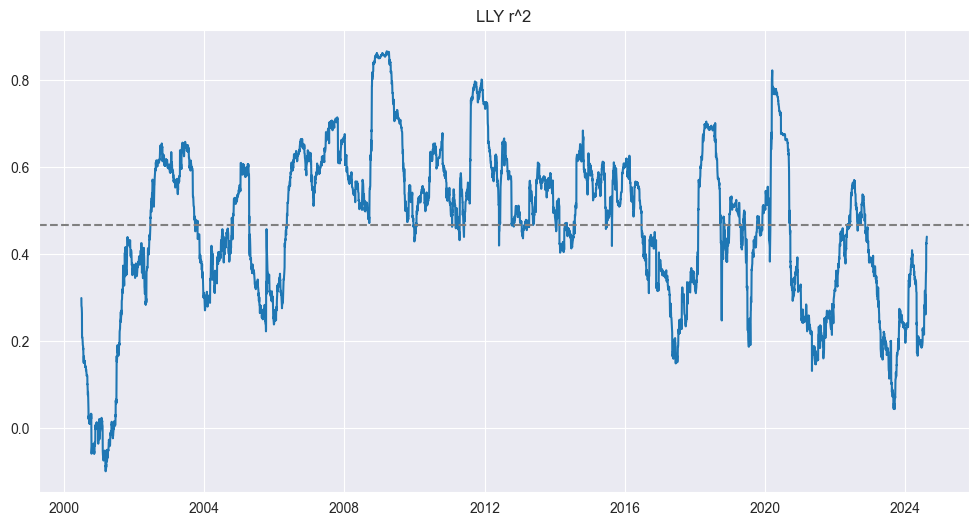

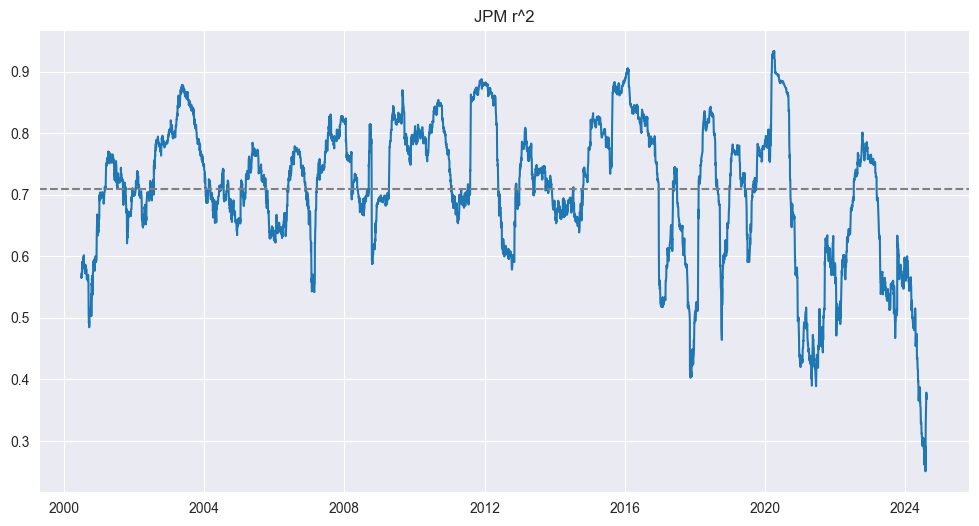

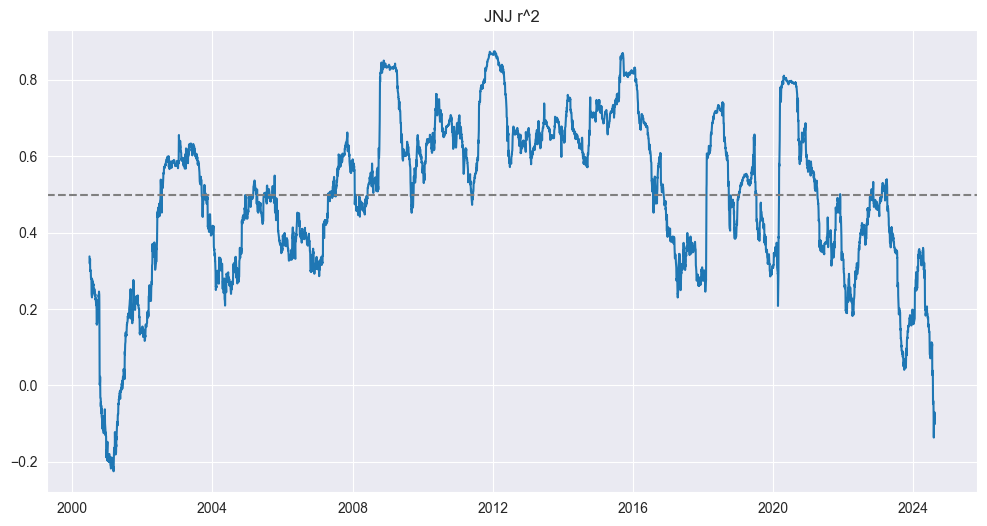

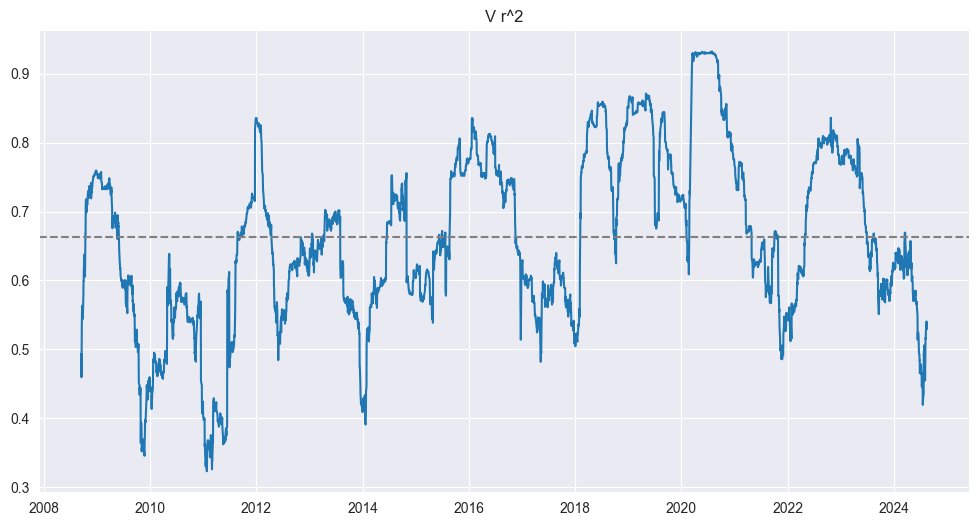

In [78]:
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    plt.plot(datess[ticker], rss[ticker])
    plt.axhline(np.array(rss[ticker]).mean(), color='grey', linestyle='--')
    plt.title(f'{ticker} r^2')